In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [31]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\result21.csv",names=['Date','Tweets'])

In [32]:
df.head(3)

,Date,Tweets
0,2020-04-06 07:40:51,b'RT @PTI_News: Karnataka Chief Minister B S Y...
1,2020-04-06 07:40:20,b'RT @PTI_News: Karnataka Chief Minister B S Y...
2,2020-04-06 07:40:16,b'RT @PTI_News: Karnataka Chief Minister B S Y...


In [33]:
df.shape

(12526, 2)

In [34]:
df=df.sample(2000)

In [35]:
df.drop('Date',axis=1,inplace=True)

In [36]:
df=df.reset_index(drop=True)

In [37]:
df.head()

,Tweets
0,b'RT @nsui: NSUI Karnataka volunteers distribu...
1,"b""RT @DKShivakumar: Corona Virus Pandemic and ..."
2,b'RT @rajeshpadmar: RSS Swayamsevaks distribut...
3,b'RT @bharathjoshi: Strained by the financial ...
4,b'RT @sagarpuranik92: @Karnataka_DIPR @Belagav...


In [38]:
print('Read first 5 tweets')
i=1
for tweet in df['Tweets'][0:5]:
    print(str(i)+ ')'+ tweet +'\n')
    i=i+1

Read first 5 tweets
1)b'RT @nsui: NSUI Karnataka volunteers distributed ration kits to needy people, who are facing problem in this lockdown in Bengaluru.\n#Ladenge\xe2\x80\xa6'

2)b"RT @DKShivakumar: Corona Virus Pandemic and the lockdown will inflict a devastating blow on our economy.\n\nHave decided to form a 'Vision Ka\xe2\x80\xa6"

3)b'RT @rajeshpadmar: RSS Swayamsevaks distributed Essential Grocery kits for Lockdown affected needy families at Sakaleshapura, Karnataka. htt\xe2\x80\xa6'

4)b'RT @bharathjoshi: Strained by the financial implications of the #COVID19 lockdown, Karnataka has restricted its expenditure to most essenti\xe2\x80\xa6'

5)b'RT @sagarpuranik92: @Karnataka_DIPR @BelagaviDipo\nThis poor dog was beaten up in Chikodi (Belagavi) and left to die on the roads. BARC (Bel\xe2\x80\xa6'



In [39]:
#clean the text
#Create a function to clean the text
import re
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removing @'s'
    text=re.sub(r'#','',text)#Removing # hash tags
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'\Ab\W+','',text)
    text=re.sub(r'\A_\w+','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\d+','',text)
    text=re.sub(r'\\x+','',text)
    text=re.sub(r'/','',text)
    text=re.sub(r'\B-','',text)
    text=re.sub(r'[^\w]', ' ', text)
    text=re.sub(r'_', '', text)
    text=re.sub(r'\n+', '', text)
    text=text.lower()
    return text


df['Tweets']=df['Tweets'].apply(cleantxt)

df.head(5)

,Tweets
0,nsui karnataka volunteers distributed ration k...
1,corona virus pandemic and the lockdown will in...
2,rss swayamsevaks distributed essential grocery...
3,strained by the financial implications of the ...
4,nthis poor dog was beaten up in chikodi bel...


In [49]:
tweets=str(df['Tweets'][0:])

In [51]:
tweets=re.sub(r'\d+',' ',str(tweets))

In [53]:
cleantweet=re.sub('\W+',' ',str(tweets))

In [54]:
cleantweet

' nsui karnataka volunteers distributed ration k corona virus pandemic and the lockdown will in rss swayamsevaks distributed essential grocery strained by the financial implications of the nthis poor dog was beaten up in chikodi bel rss swayamsevaks distributed essential grocery humanityfirst shivamogga shimoga karnataka i big salute to for your creative innovative i we kerala and karnataka are not india and pa are loosing our future while dealing with pres jama ath channel media one is adding all death it s in gokak karnataka and it s during c rss swayamsevaks distributed essential grocery rss swayamsevaks distributed essential grocery these temples of karnataka are providing free tablighijamat is a rabid outdated organisatio tnieupdatesoncovid karnataka cm ask people t coronavirusupdates karnataka reports seven m it s not a time to ignore the misery of other tablighijamat is a rabid outdated organisatio appeal to people of karnataka n nwe have seen lockdown has hit alphonso exports a

In [55]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\abhisv.CORP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[

True

In [56]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
sentences=nltk.sent_tokenize(cleantweet)

In [58]:
lemmatizer=WordNetLemmatizer()
for i in range(len(sentences)):
    words=nltk.word_tokenize(sentences[i])
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words) 

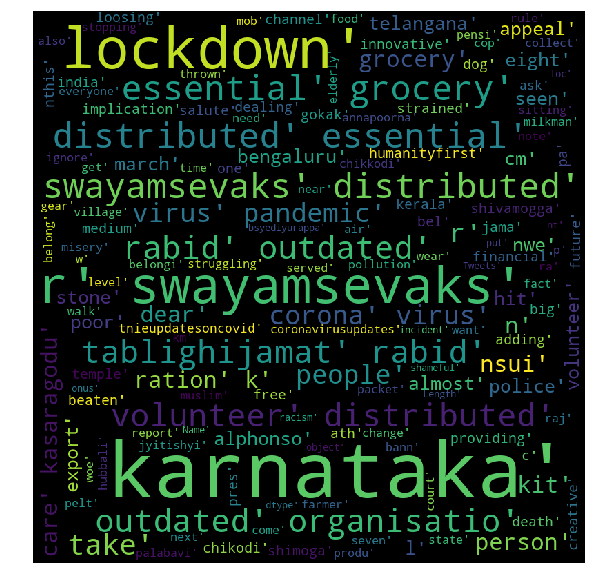

In [59]:
# importing all necessery modules 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(words)) 
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [60]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df.head(3)

,Tweets,Subjectivity,Polarity
0,nsui karnataka volunteers distributed ration k...,0.0,0.0
1,corona virus pandemic and the lockdown will in...,1.0,-1.0
2,rss swayamsevaks distributed essential grocery...,0.3,0.0


In [62]:
#Create a function to compute positive, neutral,negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [64]:
y=df['Analysis']
x=df['Tweets']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=121)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(X_train)
x_train_transformed=tf.transform(X_train)
x_test_transformed=tf.transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train_transformed,y_train)
rf.predict(x_test_transformed)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,rf.predict(x_test_transformed)))
print(accuracy_score(y_test,rf.predict(x_test_transformed)))

[[57  3  1]
 [ 0 91  3]
 [ 0 12 33]]
0.905


In [71]:
import tweepy
import csv 
# Here getting all needed credentials(consumer_key,consumer_secert,Access_token,Access_secert)
auth = tweepy.auth.OAuthHandler('vNV8PZ1A9QVJUqgnDbByBhPWy', 'iIK4G0PoV5fGm2tAf9P5zo5OdpiqBHC1CnvvRGix6rBJHYaF2S')
auth.set_access_token('541806887-1BzsMbFaDcuY5j1Nbh5VsEWr7SRRkMPSt3oZBkUE', 'MH3QRyZWWpwGP0j3eGo1r535cUUqiel1cGSjbnNk0XMi4')

api = tweepy.API(auth)

# Open/create a file to append data to
csvFile21 = open('result21.csv', 'a')

#Use csv writer
csvWriter = csv.writer(csvFile21)

for tweet in tweepy.Cursor(api.search,
                           q = "AmazonPrime",
                           #tweet_mode='extended',
                           count=1000,
                           lang = "en").items():
     # Write a row to the CSV file. I use encode UTF-8
        csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
        print (tweet.created_at, tweet.text)
csvFile21.close()

2020-05-26 09:18:19 RT @AskMagnific: With filmakers preferring OTT platforms these days, do you think OTT would be a permanent replacement to the theatres?

#A…
2020-05-26 09:18:08 RT @Joker_Fleck: I just now discovered this show #Gogol and it’s amazing! If you don’t mind reading subtitles you should check it out on #A…
2020-05-26 09:17:59 RT @CoolToysUK: Great Scott! The classic #BackToTheFuture trilogy is on #Amazon 🇬🇧 for a limited special price of £8.49 on Blu-ray. Get the…
2020-05-26 09:17:01 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/UYLGxIWbIW
2020-05-26 09:12:02 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-26 09:00:03 LTO!!!

Broke college student? 6 month FREE Amazon Prime trial!

https://t.co/v6n8CE2QxU https://t.co/TrT5bBsrZc
2020-05-26 08:58:51 With filmakers preferring OTT platforms the

2020-05-26 04:18:22 RT @DailyDealsPR: Amazon Customers I post daily PROMO deals. Please follow me to find the best deals available. Why Pay FULL price when you…
2020-05-26 04:18:08 RT @_n_andrea: https://t.co/i4Fzo0Bvfs
.
.
.
&lt;iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" fram…
2020-05-26 04:17:59 RT @kalodyne: Here is a reaslly rough start to part two of #prelude #to #insanity available on #KindleUnlimited, on #AmazonPrime, and #pape…
2020-05-26 04:17:01 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/EP6344Jj7F
2020-05-26 04:14:30 “The Lodge” (Film Review) – Dreaded Winter, A Creepy Cabin, and A Stepmom with A Sinister Past - Cinecelluloid… https://t.co/20HLZYaKeC
2020-05-26 04:13:32 https://t.co/M0MkEnULSF
.
.
.
&lt;iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling=… https://t.co/lWxU6ANZD4
2020-05-26 04:12:14 Hi Amazon cus

2020-05-25 23:18:25 RT @PBRStreetGangg: Bedevilled. Wild fem character study in revenge. Great acting, beautifully shot, a bloody mess. 8 https://t.co/flfCGRWG…
2020-05-25 23:18:14 RT @djwasham: I’m really digging Upload on Amazon Prime Video. Pretty good so far. #upload #AmazonPrimeVideo #AmazonPrime https://t.co/uA2h…
2020-05-25 23:17:58 RT @hey_kimberlee: #icymi my latest YouTube video testing out an at home gel manicure kit from #amazon! 

https://t.co/EcPZVmQwi5

#AmazonP…
2020-05-25 23:17:40 @JeffBezos The terrain is very treacherous !!
Increase security
Be creative
You know the doom #tech they have !!
I… https://t.co/OiE6TQtcxZ
2020-05-25 23:17:02 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/NZEMfY7U1T
2020-05-25 23:15:02 RT @JustAnotherLiv2: @hbomax @ATT I already pay for #HBO and #AmazonPrime but I signed up for #HBOMax the day #ZackSnydersJusticeLeaague #R…
2020-05-25 23:14:52 Bedevilled. Wil

2020-05-25 19:49:16 Join Amazon Student! ** -Earn a $10 Credit when you refer a friend, WANT TO KNOW MORE? klik: https://t.co/Qh2O1AQAwR
2020-05-25 19:48:49 Ignore the screams and gunfire, lock the door, dim the lights and read ZOMBIE LIEUTENANT.
#Zombies #Apocalypse… https://t.co/Y3f4KfQ96E
2020-05-25 19:48:28 Not sure if y’all know or not, but #AmazonPrime got some really good original series. Like a bunch of them.
2020-05-25 19:47:59 Ignore the screams and gunfire, lock the door, dim the lights and read ZOMBIE LIEUTENANT.
#ZombieApocalypse #ebooks… https://t.co/j8Mt6j7UN3
2020-05-25 19:44:36 RT @TamilTvExpress: #TTE_UPDATE
Movies Schedule

#UPDATE #webseries #AmazonPrime @SunTV @SunLifeTamil @KTVTAMIL @RajtvNetwork @zeethirai @Z…
2020-05-25 19:32:42 @vangoghz #amazonprime yeah. It's getting worse for sure
2020-05-25 19:23:49 Ghosts in Ghost Towns: Haunting The Wild West (2018) is an interesting documentary available on #AmazonPrime 

It m… https://t.co/fn6HcaySg9
2020-05-25 19:22:32

2020-05-25 16:56:51 RT @OTTGURUJINITHIN: #KeerthySuresh 's Tamil Thriller Movie #Penguin Satellite Rights Acquired By #SunTV #WorldDigitalPremiere On June 19th…
2020-05-25 16:54:50 Anyone @AmazonUK that can help!? My wife has some unauthorised activity on her account even after resetting her pas… https://t.co/1C1IkzNSGv
2020-05-25 16:51:16 #KeerthySuresh 's Tamil Thriller Movie #Penguin Satellite Rights Acquired By #SunTV #WorldDigitalPremiere On June 1… https://t.co/8XZPlJ58lt
2020-05-25 16:50:22 ▶▶▶ Best renewed / refurbished laptops computers 2020 in USA ( Top 15 ) -⚫ E N T E R ⚫ https://t.co/6w2NDOSxbL… https://t.co/TCcZdBWe5o
2020-05-25 16:49:35 https://t.co/4i4ck4bGnG
Amazon Prime New Movie GULABO SITABO trailer
Amazon Prime Video Amitabh Bachchan Ayushman K… https://t.co/cMZM5vWwnn
2020-05-25 16:49:12 A love story revolves around hells angels murder in #TheBronx #movies #movies #filmnoir #Amazing #grasslands… https://t.co/aJoEaFuZyj
2020-05-25 16:48:32 #Amazon #AmazonPrime Hi Te

2020-05-25 13:19:39 RT @UFOSculptor: Prime Time #aliens #amazon #amazonprime #USPS #UPS #area51 #shipping #UFO #sneak #trojan #horse #history #ancient #militar…
2020-05-25 13:18:26 RT @UFOSculptor: Prime Time #aliens #amazon #amazonprime #USPS #UPS #area51 #shipping #UFO #sneak #trojan #horse #history #ancient #militar…
2020-05-25 13:18:20 RT @PopcornStarz: Looking for a #switch? Perfect fun escape during this quarantine.  Amazon has a few on sale at https://t.co/QinE2CTYEK #A…
2020-05-25 13:18:11 RT @TySuite: It’s an honor to be starring in this docu-series truejourney. My journey as a pro live-streamer hasn’t been told like this bef…
2020-05-25 13:18:06 RT @syedshawon071: The way #AmazonPrime moving smartly in India, in the long run, It will be an undisputed King. #HindiSeries @PrimeVideoIN
2020-05-25 13:18:01 RT @DYFTHPodcast: Two word reviews are the best reviews. 
Listen to Episode 22 - Water Guns! wherever podcasts are streamed! 
——————
#podca…
2020-05-25 13:17:58 RT @equalitync:

2020-05-25 09:18:19 RT @TajinderSTS: World Recognise Sikhs for Saviours of Women, Sewa &amp; Humanity. #AmazonPrime show #PataalLok showed Amritdhari Sikhs watchin…
2020-05-25 09:18:18 RT @SeriesDekho: Ready for #Golkeri @PrimeVideoIN 

#hindiwebseries #seriesdekho #webseries #originalwebseries  #trending #latestwebseries…
2020-05-25 09:18:14 RT @RenMishra: Watched #Panchayat on #amazonprime .. highly recommended
2020-05-25 09:18:06 RT @ecabhi28: Hello @MalharThakar .. very happy to hear movie #ગોળકેરી is coming on #AmazonPrime #AmazonPrimeVideo .. but #shuthayu is stil…
2020-05-25 09:17:58 RT @Mrjq11: Man upload was a great show couldnt stop watching, cant wait for season 2 
#Upload #AmazonPrime
2020-05-25 09:16:06 RT @Krystyn71: @LSanditon @jordanaberit @UbiquitousMiss2 @Hope_AN @k_determinitis @rekrapyendis @SanditonSister2 @PrimeVideo @primevideouk…
2020-05-25 09:11:39 RT @nick215_Camera: Check out my new web series #BlacNight on YouTube &amp; #AmazonPrime 

All Black actors, film 

2020-05-25 05:06:48 Like there is a promotion mafia planted for movies.

Seems there is a promotion mafia planted to promote every crap… https://t.co/PbYCOWNS2Y
2020-05-25 05:02:45 @ElleDeEmme @MostafaElhagin OSN didn’t have the shows I was looking for but AmazonPrime is a great option, thank you!
2020-05-25 04:58:58 “Ignoramice....that’s more than one ignoramouse.” —Pocketful of Miracles 
#amazonprime
2020-05-25 04:57:01 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/utPmxJzgQQ
2020-05-25 04:45:43 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-25 04:39:35 All I have to say is Homecoming is the fucking shit. @juliaroberts @JanelleMonae @stephanjames @amazonprime
2020-05-25 04:39:18 PradeepDwivedi, CEO, Eros International Media Limited, speaks about what the merger with Hollywood studio STX Enter… https://

2020-05-25 00:41:56 Grandmother Pendulum wall clock You Love to give as a birthday gift 🎁.

https://t.co/Vk1AKi1m7q

#Amazon… https://t.co/CjkWPo8jsi
2020-05-25 00:40:51 12 Inch Wall clock makes an excellent addition to your kitchen decor.

https://t.co/0f1e350mSz

 #Amazon… https://t.co/yzLKs0Uq4s
2020-05-25 00:40:03 Decorative Grandfather Wall Clock That Chimes Makes A great birthday gift idea.🙂

https://t.co/FXlS8Qf4ZC

 #Amazon… https://t.co/6z8jWlLeub
2020-05-25 00:38:50 Blue Digital Wall clock makes an excellent addition to your home.

https://t.co/MEaQlQiR06

 #Amazon #AmazonPrime… https://t.co/mtcYpqM62K
2020-05-25 00:36:25 Fabulous Walnut Mantel Clock 🕰 that chimes Makes A Great  Birthday 🎂 Gift 🎁!

https://t.co/3fLE6GysAk

Amazon… https://t.co/Gg5LXJQaG3
2020-05-25 00:20:42 @SanditonRegatta @PrimeVideo @masterpiecepbs @PBSDistribution @Sanditonian1 @tipsmom3 @rekrapyendis 
@TinyToesTom05… https://t.co/z0sJiY6usS
2020-05-25 00:18:19 RT @Tom_E_56: Check out our review of thelov

2020-05-24 20:13:53 RT @earlybirdread1: A forward thinking father , much like mine 💕
#SaveSanditon 
#Sanditon
#SanditonPBS 
#sanditonsisterhood 
#AmazonPrime…
2020-05-24 20:12:06 JOIN 🕹️
#twitchstreamer MP #twitch
connect #TheLastofUs

* Not Clickbait Title * #stream
#subscribe 📢 FREE tier.1
w… https://t.co/ihpRNLK7sj
2020-05-24 20:11:31 Revlon One-Step Hair Dryer And Volumizer Hot Air Brush in Black - https://t.co/3Cc477HHIY 

FREE Amazon Prime 30-Da… https://t.co/K3kw4u2Dvs
2020-05-24 20:11:03 RT @earlybirdread1: A forward thinking father , much like mine 💕
#SaveSanditon 
#Sanditon
#SanditonPBS 
#sanditonsisterhood 
#AmazonPrime…
2020-05-24 20:10:18 RT @DougStanhope: I'm holding off on doing press for new special until #TheDyingofALastBreed is also on @Amazon @AmazonPrime as it should b…
2020-05-24 20:10:02 “A haunting and poignant insight into 19th century Haworth life and a very affecting ghostly tale.”

PARLIAMENT OF… https://t.co/vB9UMvOpiE
2020-05-24 20:09:23 A forward thinking 

2020-05-24 17:44:55 @AmazonHelp If accessing all content on Prime Video requires the subscription cost to be higher, personally I would… https://t.co/FXfI8kLrBm
2020-05-24 17:44:32 It’s not just Modern Family, I actually don’t understand this model of subscription. If I’m paying every month to a… https://t.co/heWqKshg6p
2020-05-24 17:39:24 #Upload on Amazon is part rom-com, part murder mystery, part Twilight Zone. It's also amazing world-building, casti… https://t.co/xMHCTviKpD
2020-05-24 17:36:14 RT @SherryInk: This is so not the way I want to begin my last shift before vacation.
INAPPROPRIATE
by Sherry Morris
#Romance #Comedy #CozyM…
2020-05-24 17:26:40 Advice for anyone watching #JurassicPark on #ITV who have #AmazonPrime subscriptions. 

It’s included on that, isn’… https://t.co/gCbMi1Cpb5
2020-05-24 17:20:36 Banter 😂😂

If you like this kinda stuff, join our club it’s free to do. Check out my bio 😁

#thegrandtour… https://t.co/YC1wEuT6YM
2020-05-24 17:18:33 RT @DiegoGaitanGil: Hunt

2020-05-24 14:31:12 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 14:29:25 RT @MedhaThakur1: What did you like the most?
What is more thrilling? 
#Asur vs #PatalLok #voot #AmazonIndia
#AmazonPrime @ArshadWarsi  @An…
2020-05-24 14:28:06 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to #KindleUnlimited and… https://t.co/O5dmiDKZwz
2020-05-24 14:25:19 @DJGriffinAuthor 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to… https://t.co/PUm4BIEin8
2020-05-24 14:23:57 I really liked #upload on #amazonprime and the idea of digital afterlife
2020-05-24 14:22:55 @CaraDevlinBooks 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to… https://t.co/JJt7upJhjH
2020-05-24 14:21:46 Come subscribe w/ #AmazonPrime  live at https://t.co/29i9BJ5vpb
2020-05-24 14:21:27 RT @DownToQuest: Ch

2020-05-24 12:14:32 RT @theAlexGoldberg: @StoryArtTells How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on #AmazonP…
2020-05-24 12:14:27 RT @theAlexGoldberg: @hebeccarouston Hi Rebecca! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FRE…
2020-05-24 12:14:24 RT @theAlexGoldberg: @my_grayne HI Andrew! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on #…
2020-05-24 12:14:19 RT @theAlexGoldberg: @victoria_jprice Great trailer, Victoria! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie…
2020-05-24 12:14:15 RT @theAlexGoldberg: @theNLAlexander Hi N.L.! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE o…
2020-05-24 12:14:09 RT @theAlexGoldberg: @Adam92048129 Hi Adam! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on…
2020-05-24 12:14:05 RT @theAlexGold

2020-05-24 09:01:40 RT @SherryInk: This is so not the way I want to begin my last shift before vacation.
INAPPROPRIATE
by Sherry Morris… https://t.co/k9hPgjHE6H
2020-05-24 09:01:18 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 09:00:08 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Who is the director of the show.
2020-05-24 08:58:53 RT @KoiriMaurya: @KaleYadav1 @DurgeshGupta_ @MajorPoonia @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic @KapilMishra…
2020-05-24 08:57:01 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/jdUBy6fCTK
2020-05-24 08:56:30 RT @EnterTheGhost: Vijay 'The Night-Mayor of Brentford' Shah as Inspector Rosenford | #shakespeare #hamlet #amazonprime #primevideo #indief…
2020-05-24 08:56:24 Vijay 'The Night-Mayor of Brentford' Shah as

2020-05-24 05:54:42 &gt; Unwanted sex scenes
&gt; A not so bad conman
&gt; Hindu - Muslim masala
&gt; That same screen colour of a typical crime mo… https://t.co/XfwPw0SGlM
2020-05-24 05:54:02 RT @sheetal_c2: Those who watched #patallok they can feel you bro..@IshwakSingh @PrimeVideoIN @AnushkaSharma #Ramadan #PatalLokReview #Amaz…
2020-05-24 05:52:03 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 05:50:30 Paatal lok is equal to swarg lok for indian web series lover.

#PaatalLok #AmazonPrime 

@PrimeVideoIN @PrimeVideo https://t.co/LEhWduZ5Cb
2020-05-24 05:49:46 Those who watched #patallok they can feel you bro..@IshwakSingh @PrimeVideoIN @AnushkaSharma #Ramadan… https://t.co/x3jdlkXshp
2020-05-24 05:49:11 RT @SherryInk: This is so not the way I want to begin my last shift before vacation.
INAPPROPRIATE
by Sherry Morris
#Romance #Comedy #CozyM…
2020-05-24 05:46:21 RT @mssirsa: Shame 

2020-05-24 04:26:07 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 04:25:56 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 04:25:45 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 04:25:11 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 04:24:29 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 04:24:02 Finally watching #Homecoming on @PrimeVideo 
I'll let ya' know how I feel about it later ✌🏾 #moviestowatch #AmazonPrime
2020-05-24 04:22:40 Geyiie Play Kitchen Toys for Todders, 25

2020-05-24 02:32:51 Assistindo as musas Kerry Washington e Reese Whiterspoon em  #LittleFiresEverywhere #AmazonPrime
2020-05-24 02:31:36 @imVkohli @AnushkaSharma @OfficialCSFilms For money you even lost to drAw line between right and wrong, God and Dem… https://t.co/zdkyoqJUlg
2020-05-24 02:30:42 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 02:30:26 @mssirsa @SanatanArtist @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Hindu's and sikh's need to unite again 🙏🙏
2020-05-24 02:27:59 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 02:27:50 I don't know who needs to hear this but #AmazonPrime is streaming the #remastered OG #Phantasm (1979)...probs every… https://t.co/jrXqHbL5zp
2020-05-24 02:27:47 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sik

2020-05-24 00:17:58 RT @The_Mother_Hood: One hour ‘til places people!! 9pm TONIGHT! Join @UnexpectedlyGky @PrettynBabyFood @MultiMave &amp; myself for our @TheNewP…
2020-05-24 00:15:30 RT @LivePdFans: Do 💙 #PoliceK9s like @k9_valor &amp; ones on 🔴#LivePD that make you 😁 &amp; would you like to make them smile?

If you use #AmazonP…
2020-05-24 00:15:07 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-24 00:13:32 RT @LivePdFans: Do 💙 #PoliceK9s like @k9_valor &amp; ones on 🔴#LivePD that make you 😁 &amp; would you like to make them smile?

If you use #AmazonP…
2020-05-24 00:12:36 It sucks that the only fast shipping is Amazon right now! I've ordered stuff from like 3 different stores and it's… https://t.co/NsU1z96gGR
2020-05-24 00:10:02 RT @LivePdFans: Do 💙 #PoliceK9s like @k9_valor &amp; ones on 🔴#LivePD that make you 😁 &amp; would you like to make them smile?

If you use #AmazonP…
2020-05-

2020-05-23 21:37:42 RT @theAlexGoldberg: @A_M_Lehman Hi A.M.! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on #A…
2020-05-23 21:33:59 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 21:33:51 RT @theAlexGoldberg: @MariHamill Hi Mari! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on #A…
2020-05-23 21:32:43 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 21:32:40 RT @rachel_reviews: Don't forget to check out our latest Hidden Gems Podcast. This time it's Amazon Prime! A good one @RyanCam20
#AmazonPri…
2020-05-23 21:31:58 @A_M_Lehman Hi A.M.! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE on… https://t.co/pVSHIdEgGO
2020-05-23 21:31:40 Slept til 10:30a

2020-05-23 20:02:37 JOIN 🕹️
#TheLastofUs link #twitch
#JustChatting 👾 #retrogames

American Dreams #stream
#subscribe 📢 FREE tier.1… https://t.co/r6mhwoUUD6
2020-05-23 20:01:14 💥Get Amazon PRIME:
FREE MONTH
🇨🇦 https://t.co/jaLdKpupHn
🇺🇸 https://t.co/dPJYgQpKwf

#shopping #affiliate #Amazon
2020-05-23 20:00:27 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 20:00:06 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 19:59:01 RT @SweetGrassMem: It’s Dinner &amp; A Movie Night at Sweet Grass! “Big Night” is a culinary movie 🎥 classic streaming on #AmazonPrime.  It is…
2020-05-23 19:58:20 @thfclp__ Yeah I really enjoyed S5, some cool twists and a good storyline. Nothing on S1 but not the worst season o… https://t.co/1FxQSOm7lN
2020-05-23 19:57:43 RT @SriViren: "PATRIOTISM is in our Blood" W

2020-05-23 18:54:46 RT @Krystyn24206068: @ubiquitous_miss @PrimeVideo @Sanditon @primevideouk @masterpiecepbs @PBS How wonderful and apt #sanditon #SanditonPBS…
2020-05-23 18:54:39 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 18:54:36 RT @HeasmanAuthor: @JacksonMcGrath7 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to #KindleUnlim…
2020-05-23 18:54:04 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 18:53:17 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 18:52:23 RT @SilvanosPnP: Enjoying my ABSOLUTE favourite drink ‘Limoni Peroni’ 🍺 pick a film on prime and relax for a perfect Saturday night #Silvan…
2020-05-23 18:50:14 RT @mssirsa: Sham

2020-05-23 18:15:22 @mssirsa @HarmanManchanda @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Mullas are loving t… https://t.co/xNyRKkMzdD
2020-05-23 18:14:59 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 18:13:57 RT @HeasmanAuthor: @NatashaLink1 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to #KindleUnlimite…
2020-05-23 18:13:40 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 18:12:51 @etownmiller Thrilled this came to #AmazonPrime !
2020-05-23 18:10:59 RT @theAlexGoldberg: @NatashaLink1 Hi Natasha! How about a movie? I wrote/directed the feature dark comedy @ClosureTheMovie avail FOR FREE…
2020-05-23 18:09:44 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji

2020-05-23 17:06:53 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 17:05:18 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 17:04:43 Watching #ModernLove  on #AmazonPrime
2020-05-23 17:04:29 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 17:04:06 RT @TajinderSTS: World Recognise Sikhs for Saviours of Women, Sewa &amp; Humanity. #AmazonPrime show #PataalLok showed Amritdhari Sikhs watchin…
2020-05-23 17:03:27 RT @TajinderSTS: World Recognise Sikhs for Saviours of Women, Sewa &amp; Humanity. #AmazonPrime show #PataalLok showed Amritdhari Sikhs watchin…
2020-05-23 17:00:43 Download our Kindle Book 'The Complete Men's Health Plan' book, by J Lane':

https://t.co/YZSGfyKu8W  

Also ava

2020-05-23 16:05:56 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 16:04:57 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 16:01:23 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 16:01:16 #LaronAustin #ReelOneEntertainment feature film #Blackhats.
Now on #AmazonPrime for viewing. https://t.co/5azzlUlaTM
2020-05-23 16:00:33 RT @HeasmanAuthor: @AuthorAAC 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to #KindleUnlimited a…
2020-05-23 15:59:49 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 15:58:09 RT @WickedShineGame: @amazonprime I know y

2020-05-23 15:07:18 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 15:06:37 RT @SriViren: "PATRIOTISM is in our Blood" We Nepali Speaking Gorkha Indians shall fight and die for INDIA,when time may come. But Stop RAC…
2020-05-23 15:05:55 RT @candystreats: @BradWallActor @LOLoften @kaceyainsworth @terri_dwyer @DonnaSiggers1 @SamesCarolyn @Karen_acts @salesslayer @NBangen @cla…
2020-05-23 15:05:40 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 15:00:55 Share the #freeshipping, #music, #movies, and #tvshows love and give the gift of #AmazonPrime… https://t.co/1MkVbm2ZjK
2020-05-23 15:00:46 Download our Kindle Book 'The Future Python: Object Orientated Programming', by J Coupland:… https://t.co/YD91BcCD3m
2020-05-23 15:00:44 RT @xclusivcc: NOW ON AMAZON PRIME! #drama #hollywood #hbo #tv

2020-05-23 14:17:33 Maybe I’ll watch Eat Drink Man and Women tonight on #AmazonPrime for  #AsianHeritageMonth.
2020-05-23 14:16:15 While #amazonprime, #DisneyPlus #Hotstar, #zee5 etc are giving there subscription at affordable prices.
But… https://t.co/Urs2mvKTYl
2020-05-23 14:16:10 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic @AnushkaSharma @imVkohli This is now… https://t.co/qUsQKkhFhU
2020-05-23 14:15:11 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 14:15:01 @DougStanhope @amazon @AmazonPrime The video quality is better if you watch it online. I tried to rewatch it from t… https://t.co/fJzWeUAK6H
2020-05-23 14:14:42 RT @CoolToysUK: In-stock and available for next day #AmazonPrime shipping 🇬🇧, #ManEater @maneatergame for XBOX One and PS4 🦈 
.
Affiliate l…
2020-05-23 14:13:59 Similar-Movie Lists at FilmTagger help you find movies most like the film

2020-05-23 13:20:29 @MKSBsays @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic @PrimeVideoIN khud kuch na… https://t.co/XQCgVQ8q0s
2020-05-23 13:20:10 @guptaunnati06 @Simranp48361307 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Chan… https://t.co/nTnSKomIKz
2020-05-23 13:20:00 Web series made with malafide intention releasing at lockdown time. It has hurt Hindus, Shikhs, Gorkhas, dalits, Gu… https://t.co/o8mSoRi2s5
2020-05-23 13:19:37 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 13:18:26 RT @asheemtapadia: #Mirzapur or #PatalLok - by far #Mirzapur, handsdown 

#AmazonPrime @PrimeVideoIN
2020-05-23 13:18:18 RT @jtshchaudhari32: #amazonprime hello team I have not received my Icici bank amazon pay card
2020-05-23 13:18:15 RT @TySuite: It’s an honor to be starring in this docu-series truejourney. My journey as a pro live-s

2020-05-23 12:34:27 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 12:33:13 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 12:32:24 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Producer Director equally at fault..… https://t.co/YAZg4ACf2Z
2020-05-23 12:32:11 RT @ItzMonsterVJ: Vintage Thalapathy Movies Added on #AmazonPrime Recently.

Always People's Fav Thalapathy Vijay 🤩
#Master @actorvijay
htt…
2020-05-23 12:31:08 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic @JagmohanSodhi this happened...… https://t.co/YD93MSPzSt
2020-05-23 12:30:57 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 12:30:32 Damn, watching The Sea

2020-05-23 11:42:09 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 11:41:59 RT @candystreats: @BradWallActor @LOLoften @kaceyainsworth @terri_dwyer @DonnaSiggers1 @SamesCarolyn @Karen_acts @salesslayer @NBangen @cla…
2020-05-23 11:41:40 @AnushkaSharma Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to t… https://t.co/8j5uUBIzs3
2020-05-23 11:41:37 @AviaGmail 3x #memoirs, 1x #CrimeFiction novel - All available worldwide via #Amazon and all #FREE to… https://t.co/FEaenEIUhl
2020-05-23 11:40:46 RT @candystreats: @BradWallActor @LOLoften @kaceyainsworth @terri_dwyer @DonnaSiggers1 @SamesCarolyn @Karen_acts @salesslayer @NBangen @cla…
2020-05-23 11:40:34 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 11:40:04 RT @mssirsa: Shame on @Anushka

2020-05-23 10:59:50 BIG DISCOUNT.CRAZY SPECIALS.ONLY 20.
Country：US
PRODUCT：Sonic Electric Toothbrush
Original price：$39.99
After code… https://t.co/2ScYNntsST
2020-05-23 10:59:22 @mssirsa @Manoj28345898 @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Hindus and Sikhs both… https://t.co/M2iQF1CO2R
2020-05-23 10:58:37 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:57:55 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:57:14 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic @AnushkaSharma is anti hindu and we… https://t.co/P9cHjj542E
2020-05-23 10:55:20 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:55:05 RT @mssirsa: Shame 

2020-05-23 10:11:53 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:11:17 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:10:58 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:10:56 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Sir ji, @PrakashJavdekar will do not… https://t.co/PminP8hm9b
2020-05-23 10:10:28 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:10:15 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 10:09:25 RT @mssirsa: Shame 

2020-05-23 09:38:04 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:37:53 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:37:51 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:37:11 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/mGpdwquC4A
2020-05-23 09:36:51 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:36:13 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:35:32 RT @mssirsa: Shame 

2020-05-23 09:08:09 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:07:59 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic I stand with you Sirsa ji..... The s… https://t.co/IswTadgh5I
2020-05-23 09:07:45 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:07:25 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:07:23 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:07:18 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 09:07:08 RT @mssirsa: Shame 

2020-05-23 08:43:42 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 08:43:34 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 08:43:22 RT @JulieHouston2: The bestselling #AVillageAffair is at

 #54

 in Amazon charts 

FREE #kindleUnlimited
FREE #AmazonPrime 
or JUST 99p fo…
2020-05-23 08:43:03 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 08:42:42 RT @mssirsa: Shame on @AnushkaSharma @AmazonPrime for showing Sikhs as Rapists
I request @PrakashJavdekar Ji to take strong action against…
2020-05-23 08:42:41 @mssirsa @AnushkaSharma @AmazonPrime @PrakashJavdekar @ANI @TimesNow @republic Don’t wait for @PrimeVideoIN to respond file a case
2020-05-23 08:42:28 RT @mssirsa: Shame on @Anush

2020-05-23 07:34:07 @Tom48057552 @Not_AmazonPrime I've never said this to you I don't think but good night Ooof!!!
2020-05-23 07:32:51 @DIRTYMAX0955 @Not_AmazonPrime Of course!
2020-05-23 07:32:20 Go follow @Not_AmazonPrime cuz he's a total banger of a kidd and also follow his twitch it's AmazonPrime3515624 if… https://t.co/L7tVKJp9qb
2020-05-23 07:23:08 PATAL LOK outstanding series! #AmazonPrime #inspector #HathiRamChoudhary 👍🏻
2020-05-23 07:18:33 RT @onedire15778714: WE LOVE YOU HARRY 
#Netflix #YouTube #Spotify #AmazonPrime 
@Louis_Tomlinson #LouisTomlinson #WHO #king #OneDirection…
2020-05-23 07:18:25 RT @varunographic: We understand the importance of client satisfaction and always open to ample designing options and don’t frustrate with…
2020-05-23 07:18:16 RT @narayana88: an ensemble star cast with an interesting fun ride on the demonetisation... check out this #Kannada movie Mayabazar 2016 in…
2020-05-23 07:15:55 6000 lumens Super Bright Handheld Flashlight.
Use Code:50UUUKQU, y

2020-05-23 04:04:23 #AmazonPrime #JeffBezos are the drivers meeting your expectations? https://t.co/2eFwKC9xlm
2020-05-23 04:00:10 1-2 #theatres of 10 may close because production houses have started releasing online. Online media distribution co… https://t.co/7IJ1LHKdVU
2020-05-23 03:52:26 #AmazonSpinandWin
#Amzon
#AmazonPrime 
#amazonin 
Yeah... https://t.co/73bPuoHwun
2020-05-23 03:51:24 #QuizTimeMorningsWithAmazon
#Amazon
#amazonin 
#AmazonPrime 
Waiting for 30th june...... https://t.co/yYzTw7spnD
2020-05-23 03:50:11 #MovieTime, watching #TheGracefieldIncident #AmazonPrime
2020-05-23 03:40:29 @billmaher And has #AmazonPrime completely disappeared? Nothing I’ve searched for this week is available on prime.
2020-05-23 03:37:49 BIG DISCOUNT.CRAZY SPECIALS.ONLY 20.
Country：US
PRODUCT：Sonic Electric Toothbrush
Original price：$39.99
After code… https://t.co/9CZGYmStpy
2020-05-23 03:31:37 @lisalovesbaconx It’s the next one I’m watching on #amazonprime
2020-05-23 03:31:20 I just cancelled 

2020-05-23 00:57:27 Recommended #Upload #AmazonPrime #scifi #afterlife #TV #streamer #geekout https://t.co/rqwiHzkk3C
2020-05-23 00:57:02 Pendulum wall clock You Love to give as a birthday gift 🎁.

https://t.co/Vk1AKi1m7q

#Amazon #AmazonPrime #clock #clocks #homedecor #gift
2020-05-23 00:55:42 Free for US reviewer
message me
#freebies #amazonreviewer #AmazonDeals #AmazonPrime https://t.co/wvGeCfRFYE
2020-05-23 00:51:03 12 Inch Wall clock makes a perfect addition to your bathroom.

https://t.co/0f1e350mSz

 #Amazon #AmazonPrime… https://t.co/WfRQ8TZFa6
2020-05-23 00:50:04 Lovely Grandfather Wall Clock That Chimes Makes A great birthday gift idea.🙂

https://t.co/FXlS8Qf4ZC

 #Amazon… https://t.co/8NWz56Wd0o
2020-05-23 00:48:39 Blue Digital Wall clock Makes a perfect to your study room.

https://t.co/MEaQlQiR06

 #Amazon #AmazonPrime #clock #clocks #homedecor #gifts
2020-05-23 00:47:39 RT @givemecheap: Share the #freeshipping, #music, #movies, and #tvshows love and give the gift of #Amaz

2020-05-22 21:29:02 Amazon Air's freighter fleet projected to hit 200 aircraft in the next 8 years. https://t.co/Qei7cGL64B #aircargo… https://t.co/qivssl4ALW
2020-05-22 21:28:39 #welfare #NYC seriously #AmazonPrime what kind of insult it's this to the working class. https://t.co/X9oHElBd30 https://t.co/JyisZ6zXRM
2020-05-22 21:23:59 RT @CannabisGInc: Cannabis Global Inc. has so many exciting things on the horizon for its $MCTC shareholders. From the launch of our #infus…
2020-05-22 21:23:55 RT @CannabisGInc: Cannabis Global Inc. has so many exciting things on the horizon for its $MCTC shareholders. From the launch of our #infus…
2020-05-22 21:23:51 RT @CannabisGInc: Cannabis Global Inc. has so many exciting things on the horizon for its $MCTC shareholders. From the launch of our #infus…
2020-05-22 21:23:47 RT @CannabisGInc: Cannabis Global Inc. has so many exciting things on the horizon for its $MCTC shareholders. From the launch of our #infus…
2020-05-22 21:23:44 RT @CannabisGInc: Ca

2020-05-22 18:37:08 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/WY7ryWZvSx
2020-05-22 18:36:18 RT @SavvyScreener: Today, May 22, 'Homecoming,' a drama about an unconventional wellness company, returns for Season 2 on #AmazonPrime. #Ho…
2020-05-22 18:35:11 @DougStanhope @amazon @AmazonPrime 10 USD is a lot in Brazil, but after watching that ending I almost bought the sa… https://t.co/U2ePz8YoRB
2020-05-22 18:33:41 Anyone else regretting not buying that thing they needed in March off @amazon #AmazonPrime bc the May delivery date… https://t.co/ht1zVx1JkH
2020-05-22 18:33:37 Please recommend me a series (preferably crime) on Amazon Prime video pls, never watched anything on there 💻#AmazonPrime #PrimeVideo
2020-05-22 18:33:14 #AmazonPrime has the WORST UI of any streaming service. Utter, utter wankpuffins. Improve it immediately.
2020-05-22 18:31:05 Sound is 50% of your film. 
#FemaleFilmmakerFriday 
#From

2020-05-22 16:21:16 RT @HeasmanAuthor: @CjSAuthor Hi. I have 3x #memoirs and 1x #CrimeFiction novels available worldwide in #Kindle and #paperback formats. All…
2020-05-22 16:21:13 #amazonprime ‘s #UploadOnPrime is soo goood.
2020-05-22 16:20:41 RT @SilkCelluloid: A #Huawei #SmartPhone with #HarmonyOS will not have #Netflix no #Instagram no #Facebook no #Spotify no #AmazonPrime so o…
2020-05-22 16:19:02 RT @Jaideepahalwat: Eagerly waiting for normal days😥 
#PatalLok #Patal_Lok #patalok #pataallok #amazonprime #PrimeVideo  #jaideepahlawat #A…
2020-05-22 16:18:27 RT @SilkCelluloid: A #Huawei #SmartPhone with #HarmonyOS will not have #Netflix no #Instagram no #Facebook no #Spotify no #AmazonPrime so o…
2020-05-22 16:18:18 RT @awaisgill84: Earn a £3 bounty by promoting the Prime Student 6-Month Trial
https://t.co/FcpUXG318W
#UK #Bounty #BankHolidayWeekend #Fri…
2020-05-22 16:18:15 RT @FitxUsa: Who Don't Love the Deals🚴‍♀️
⚡️**https://t.co/rXPmpCaZIn⚡️

**Nationwide Free Shipping**

#Deals 

2020-05-22 14:49:04 All this time I had no idea this was included.  Amazon is the greatest company ever. #AmazonPrime https://t.co/vrCMLvvRZj
2020-05-22 14:48:28 Join Amazon Student! ** -Earn a $10 Credit when you refer a friend, WANT TO KNOW MORE? klik: https://t.co/Qh2O1AQAwR
2020-05-22 14:47:17 RT @turnerschofield: I’m thrilled and humbled to be nominated for the @DaytimeEmmys, as a Guest Star in @studiocity_show on #AmazonPrime. T…
2020-05-22 14:47:03 RT @bhagyashree123: Loved the new #AmazonPrime series #pataallok .
Special kudos to the writer #SudipSharma .
Superb potrayal of Hathiram b…
2020-05-22 14:45:51 #AmazonPrimeDay appears to be moving to September due to the coronavirus pandemic. #ecommerce #smallbusiness… https://t.co/ofDuwCb0ca
2020-05-22 14:44:35 YES YES! 💯😆
Want this? Get this in the link below:
https://t.co/eITsAh2eys

#TwoFatChimps #FunnyShirts #Funny… https://t.co/vKxMrCM0kq
2020-05-22 14:43:11 RT @CannabisGInc: Cannabis Global Inc. has so many exciting things on 

2020-05-22 12:27:57 RT @Krystyn24206068: @NunyaB127 @ubiquitous_miss @PrimeVideo @PBS @masterpiecepbs @Sanditon No slacking!! #Sanditon #SanditonPBS #SanditonS…
2020-05-22 12:26:53 #Choked coming on 5th June @NetflixIndia 

#hindiwebseries #seriesdekho #webseries #originalwebseries  #trending… https://t.co/5fZ0QQd7aP
2020-05-22 12:25:50 RT @risapulver: #hypothefilm can be watched on #AmazonPrime #t1d #hypoglycemia #livingwithtype1diabetes @BeyondType1 @JDRF
2020-05-22 12:21:56 Good morning y’all! What a stream. Had some great games with some great people. Funny moments, and also,… https://t.co/AwsBKYFhP7
2020-05-22 12:21:28 INDIA web series on coronavirus
Watch the first episode clicking here https://t.co/q7CY5OcZP1
Like share and Subscr… https://t.co/EKlGtEio8P
2020-05-22 12:18:54 Huawei Watch GT 2e with 14-day battery, Heart Rate monitor launched in India !

Price and Availability details here… https://t.co/wMBvZ1fSxM
2020-05-22 12:18:28 RT @Zevi_RR: OFERTA AURICULARES GAMING LOGITEC

2020-05-22 09:32:32 RT @bhagyashree123: Loved the new #AmazonPrime series #pataallok .
Special kudos to the writer #SudipSharma .
Superb potrayal of Hathiram b…
2020-05-22 09:32:28 RT @bhagyashree123: Loved the new #AmazonPrime series #pataallok .
Special kudos to the writer #SudipSharma .
Superb potrayal of Hathiram b…
2020-05-22 09:30:07 .@amazon Prime Day to be pushed back until September while sources say its rapid delivery times could not return to… https://t.co/MVdgxqPXv0
2020-05-22 09:27:49 Amazon India on Thursday said it is launching its food delivery operations in select parts of Bengaluru, a move tha… https://t.co/6xf8ztLSiK
2020-05-22 09:27:32 #Homecoming #Season2 starring the incomparable #JanelleMonae ⁦@JanelleMonae⁩ is streaming on #AmazonPrime NOW❗️❗️❗️… https://t.co/yF13DSZlYh
2020-05-22 09:26:02 RT @MovieTalkies: are you all excited for #GulaboSitaboTrailer? To be out today @4 pm

#AmitabhBachchan  #gulabositabo #bigb #AyushmannKhur…
2020-05-22 09:18:04 RT @AskAttest:

2020-05-22 07:18:04 RT @dads_film: 🎥OUT NOW🎞️

This weeks show contains a fight to the death, dinosaurs and a camping trip. You wouldn't want to miss this one!…
2020-05-22 07:17:57 The Hidden Gems Podcast! This week talking Amazon Prime and it's an amazing group of 10! 
Available on youtube and… https://t.co/V2s9YocoCB
2020-05-22 07:16:10 RT @Jaideepahalwat: My journey ❤️ from being a villain in #commando to #HathiRamChoudhary #patallok 
#AmazonPrime #PrimeVideoIN https://t.c…
2020-05-22 07:12:46 RT @bhagyashree123: Loved the new #AmazonPrime series #pataallok .
Special kudos to the writer #SudipSharma .
Superb potrayal of Hathiram b…
2020-05-22 07:11:19 .#OTT sites desperately woo fans with tasteless tweets
#Mohanlal60 #AlluArjun #AmazonPrime #Netflix 
https://t.co/ZnaJtxVLwO
2020-05-22 07:11:04 .#OTT sites desperately woo fans with tasteless tweets
#Mohanlal60 #AlluArjun #AmazonPrime #Netflix 
https://t.co/nDeIcfVWfr
2020-05-22 07:10:06 🎥OUT NOW🎞️

This weeks show contains a fight to

2020-05-22 05:23:28 @PrimeVideoIN It is obviously the great #frenchbiryanionprime. I was born on 25 July 2020 and my mother bought me a… https://t.co/vTb0woWwc1
2020-05-22 05:22:46 @TylerMcD65 @JUSTWORLD01 @knighthawk3555 @Not_AmazonPrime Always a pleasure to come out and olay with you ❤️ even t… https://t.co/wq6pLBbHXn
2020-05-22 05:22:19 Just Completed #PataalLok
Thoroughly Enjoyed It!
Good to see @AnushkaSharma
backing something new everytime.… https://t.co/zHJgrdiGfs
2020-05-22 05:22:06 What a stream! Thank you @JUSTWORLD01 and @knighthawk3555 for tonight bitties and subs! Also, everyone that came ou… https://t.co/n93vJloRA3
2020-05-22 05:20:53 RT @Arun143Vijay: AMAZON PRESENTS 

#Penguin OFFICIAL TRAILER SOON !!!

#PenguinOnPrime JUNE 19

STREAM Language :
#Tamil  🐧 #Telugu 🐧 #Mal…
2020-05-22 05:18:16 RT @Arun143Vijay: AMAZON PRESENTS 

#Penguin OFFICIAL TRAILER SOON !!!

#PenguinOnPrime JUNE 19

STREAM Language :
#Tamil  🐧 #Telugu 🐧 #Mal…
2020-05-22 05:18:08 RT @Deweysmovies: Out

2020-05-22 02:15:21 @QL_24 I don't think I've seen the movie. Did AmazonPrime adapt it too as part of season 2?
2020-05-22 02:10:23 @AmazonPrime what? https://t.co/GnRDyr1K9y
2020-05-22 02:07:25 RT @DougStanhope: I'm holding off on doing press for new special until #TheDyingofALastBreed is also on @Amazon @AmazonPrime as it should b…
2020-05-22 02:06:47 RT @clintonfein: .@JeffBezos, what are you going to do with it all when you’re dead? Have them shove it up your ass? You can’t take it with…
2020-05-22 02:02:00 #Commentary - 'I'm sick of fees just to be a customer'

https://t.co/hZp4O63iuh

#amazonprime #costco… https://t.co/8PFy0twGGC
2020-05-22 01:57:01 Get those Amazon purchases 🎁shipped faster for free 
One month #free #Amazon Prime trial
6 month 👀 free for student… https://t.co/6xWTbAIfsY
2020-05-22 01:51:27 So the #Sopranos are gone from #AmazonPrime?
2020-05-22 01:50:42 RT @DougStanhope: I'm holding off on doing press for new special until #TheDyingofALastBreed is also on @Amazo

2020-05-21 23:30:41 Hmm...clearly @amazon is on #trend, using this bullshit Corona Virus Covid19 hysteria to DELAY their deliveries.… https://t.co/oFMM2gTsqa
2020-05-21 23:26:48 RT @DougStanhope: I'm holding off on doing press for new special until #TheDyingofALastBreed is also on @Amazon @AmazonPrime as it should b…
2020-05-21 23:21:47 @amazon so how do yall go about fixing the fact today yells delivery driver "hand delivered package to a resident".… https://t.co/QIcv8q4tAy
2020-05-21 23:21:29 RT @mssamanthat: @AmazonHelp so how do yall go about fixing the fact today yells delivery driver "hand delivered package to a resident". Wh…
2020-05-21 23:21:18 @AmazonHelp so how do yall go about fixing the fact today yells delivery driver "hand delivered package to a reside… https://t.co/Pkxw9XXMgw
2020-05-21 23:18:34 RT @headgeek666: Ok - so COSMOS is about 3 eager astronomers going out in the woods &amp; picking up a helluva signal - I enjoyed it, despite a…
2020-05-21 23:18:24 RT @Librarian

KeyboardInterrupt: 

In [75]:
df_holdout=pd.read_csv(r"C:\Users\abhisv.CORP\result21.csv",names=['Date','Tweets'])

In [76]:
df_holdout.shape

(4675, 2)

In [78]:
df_holdout.drop('Date',axis=1,inplace=True)

In [79]:
df_holdout_transformed=tf.transform(df_holdout['Tweets'])

In [80]:
rf.predict(df_holdout_transformed)

array(['Neutral', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [86]:
pd.DataFrame(rf.predict(df_holdout_transformed))[0].value_counts()

Neutral     3767
Positive     718
Negative     190
Name: 0, dtype: int64

In [12]:
#Get subjectivity and polarity, subjectivity tells how subjective or opinion the text is, polarity tells how positive or negative the text is

In [224]:
from textblob import TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df.head(4)

,Tweets,Subjectivity,Polarity
0,due to the lockdown and closure of state borde...,0.375,-0.125
1,rss swayamsevaks distributed essential grocery...,0.300,0.000
2,karnataka is the only state where an all party...,1.000,0.000
3,unseasonal rains manpower shortage amp no b...,0.000,0.000


In [ ]:
#To check how well the sentiments are distributed, we use worldcloud, most highly used words are highlighted heavily.

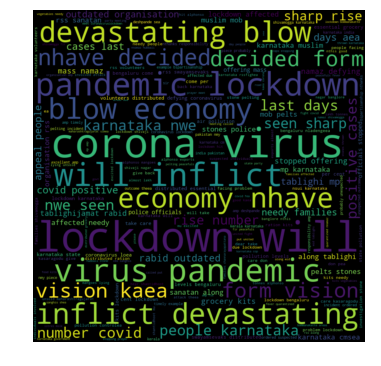

In [225]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 
allwords=''.join ([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                min_font_size = 5).generate(str(allwords)) 
  
# plot the WordCloud image                       
plt.figure(figsize = (5,5), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [227]:
#Create a function to compute positive, neutral,negative analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [229]:
#print all of the positive tweets
j=1
sorteddf=df.sort_values(by='Polarity')
for i in range(0,sorteddf.shape[0]):
    if(sorteddf['Analysis'][i]=='Positive'):
        print(str(j)+ ')' +sorteddf['Tweets'][i])
        print()
        j=j+1

1)we  kerala and karnataka  are not india and pakistan   n nmy piece on what is probably the most unexpected outcome of theea 

2)just hear this shantidhoot mu  i how excited she is as there s no lockdown in shivaji nagar  banglore  n nthis is not good kaea 

3) delhi n ncrowd gathering at bus stop n nmosque gathering despite of corona lockdown  resulted many positive n ncovid positiveea 

4)a scene from coorg in karnataka  when the roads are empty  elephants get more elbow room for movement and they step in to rea 

5)citing lack of transport to reach markets  farmers cultivating the famous hoovinahadagali jasmine in ballariea 

6)senior citizens lined up in queue for the first time to collect pension after lockdown in anekal taluk ofea 

7)just hear this shantidhoot mu  i how excited she is as there s no lockdown in shivaji nagar  banglore  n nthis is not good kaea 

8)karnataka had the third most cases when lockdown began and now it has gone down to tenth position and yet there are 

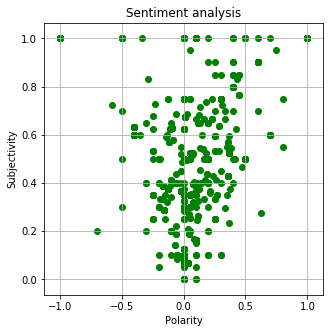

In [230]:
#Plot polarity vs subjectivity
plt.figure(figsize=(5,5))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()

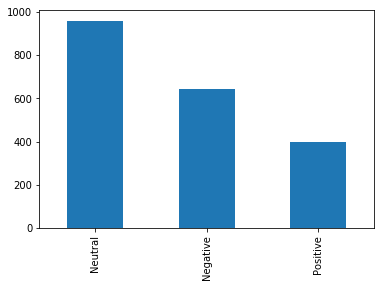

In [231]:
#Lets plot and visualize the counts
df['Analysis'].value_counts().plot(kind='bar')